<a href="https://colab.research.google.com/github/MomenJabr/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Prediction of Product Sales  
### Data Science  Project

This project demonstrates a complete data analysis workflow applied to a real-world sales dataset.  
The notebook focuses on exploratory data analysis, statistical interpretation, and visualization techniques commonly used by data scientists in retail analytics.


- Author: Momen Jabr

## 🎯 Project Objective

The objective of this project is to analyze historical product sales data and extract meaningful insights using data visualization and descriptive statistics.

This analysis helps answer questions such as:
- How are sales distributed across products?
- Do numerical features show skewness or irregular patterns?
- How do mean and median values compare within each feature?


## Load and Inspect Data

In [277]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 🧰 Tools & Technologies

The following tools and libraries are used in this project:

- **Python**  
- **pandas** for data manipulation  
- **matplotlib & seaborn** for data visualization  



In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 📂 Data Loading

The dataset is loaded into a pandas DataFrame, providing a structured format for efficient exploration and analysis.


In [279]:
fpath = '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fpath)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

This section focuses on preparing the dataset for analysis by handling missing values, verifying data types, and ensuring overall data consistency.


In [280]:
df.shape

(8523, 12)

In [281]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [282]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Check for duplications

In [283]:
df.duplicated().sum()

np.int64(0)

In [284]:
df.nunique()/len(df)*100

,0
Item_Identifier,18.291681
Item_Weight,4.869178
Item_Fat_Content,0.058665
Item_Visibility,92.455708
Item_Type,0.187727
Item_MRP,69.670304
Outlet_Identifier,0.117330
Outlet_Establishment_Year,0.105597
Outlet_Size,0.035199
Outlet_Location_Type,0.035199


In [285]:
duplicated_Item_Identifier = df[df.duplicated(subset=['Item_Identifier'])]
duplicated_Item_Identifier.sort_values('Item_Identifier')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
7467,DRA12,11.60,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
1197,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
...,...,...,...,...,...,...,...,...,...,...,...,...
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
2839,NCZ54,14.65,Low Fat,0.083359,Household,161.9552,OUT046,1997,Small,Tier 1,Supermarket Type1,4711.2008
7738,NCZ54,14.65,Low Fat,0.083699,Household,163.4552,OUT018,2009,Medium,Tier 3,Supermarket Type2,2599.2832
1896,NCZ54,NaN,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768


### Check for Null Values

In [286]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


### now we will find a solution to handle these null values
- find the categories columns and fill the word Missing in null values
- find the numbers columns fill the mean value in null values


In [287]:
cat_col = df.select_dtypes(include='object').columns
num_col = df.select_dtypes(exclude='object').columns

In [288]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


### Handling Missing Values Using Group-Based Mean


In [289]:

mean_by_item_type = df.groupby('Item_Type')['Item_Weight'].mean()

for item_type in mean_by_item_type.index:
    df.loc[
        (df['Item_Type'] == item_type),
        'Item_Weight'
    ] = mean_by_item_type[item_type]



### checking for null values

In [290]:
df['Item_Weight'].isna().sum()

np.int64(0)

In [291]:
df[(df['Item_Weight']>0) & (df['Item_Fat_Content'] == 'Low Fat')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,13.426069,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,FDN15,12.817344,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,13.384736,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
7,FDP10,12.987880,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
10,FDY07,13.224769,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
...,...,...,...,...,...,...,...,...,...,...,...,...
8515,FDH24,12.277108,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,13.853285,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8518,FDF22,12.987880,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,13.142314,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136


###Filling categoral null values

In [293]:
df[cat_col] = df[cat_col].fillna('Missing')
# df['Item_Weight'].isna().sum()




### Cheack if there is any null remains

In [294]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


#Consistenty

### to find inconsistenty
- first we will show every column values




In [295]:
for col in cat_col:
  x = df[col].value_counts()
  y = df[col].nunique()
  print(f'The values in {col} are:\n {x} \n and the number of unique values is : \n {y}')
  print('\n')

The values in Item_Identifier are:
 Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64 
 and the number of unique values is : 
 1559


The values in Item_Fat_Content are:
 Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64 
 and the number of unique values is : 
 5


The values in Item_Type are:
 Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Nam

### we can see that Item_Fat_Content has inconsistenty, so we will replace the values inonsistent values with just one value

In [296]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


## Summary for numerical values:

In [297]:
for col in num_col:
  x = df[col].describe()

  print(f'The Summary for {col} is:\n {x}')
  print('\n')

The Summary for Item_Weight is:
 count    8523.000000
mean       12.857890
std         0.581041
min        11.346936
25%        12.305705
50%        12.987880
75%        13.224769
max        13.853285
Name: Item_Weight, dtype: float64


The Summary for Item_Visibility is:
 count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


The Summary for Item_MRP is:
 count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


The Summary for Outlet_Establishment_Year is:
 count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64


The Summary for Item_O

## Exploratory Data Analysis

In [298]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,13.426069,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,11.847460,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,12.817344,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,13.224769,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,13.384736,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [299]:
df[num_col].shape[1]



int(2.6)
num_col[0]
x=num_col[0]
x




'Item_Weight'

###  Distribution of Numerical Features with Mean and Median


### Multi-Plot Visualization Using a Single Figure

In this section, a single `figure` is used to create multiple `axes`, allowing several histograms to be displayed within one unified layout.

This approach demonstrates:
- Efficient use of plotting code  
- The ability to manage multiple visualizations within a single figure  
- Programmatic control of axes using loops  

By placing the plotting logic inside a loop, the code becomes more scalable and adaptable to datasets with varying numbers of numerical features.

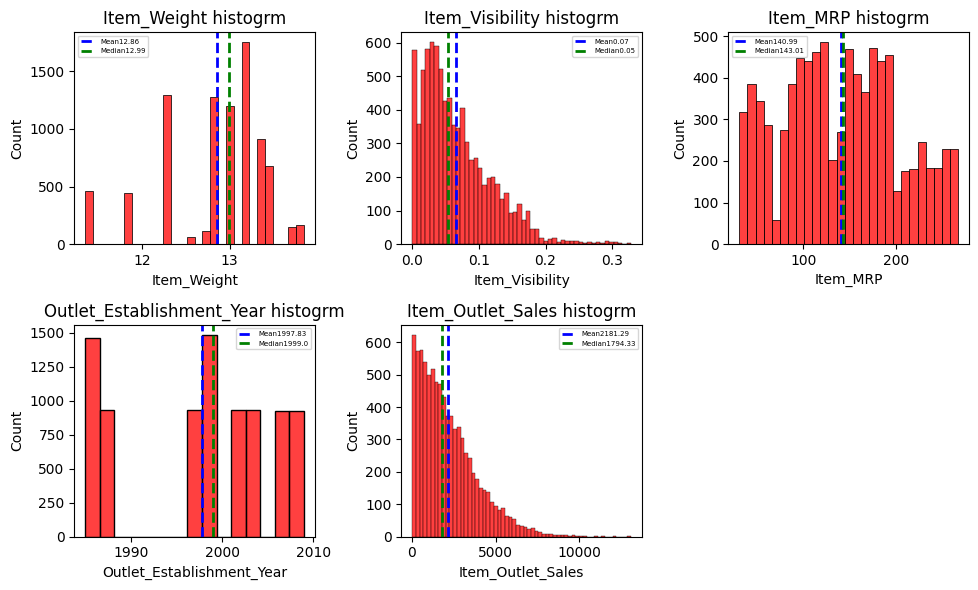

In [300]:

fig, axes = plt.subplots(nrows=int((df[num_col].shape[1])/2), ncols=df[num_col].shape[1]-int((df[num_col].shape[1])/2), figsize=(10, 6))

nrows=int((df[num_col].shape[1])/2)
ncols=df[num_col].shape[1]-int((df[num_col].shape[1])/2)
numb_col=0
for nrows in range(0,nrows):
     for ncols in range(0,ncols):

       sns.histplot(data=df, x=num_col[numb_col], ax = axes[nrows,ncols], color = 'red')
       axes[nrows,ncols].set_title(num_col[numb_col]+' histogrm', fontsize = 12)
       mean=round(df[num_col[numb_col]].mean(),2)
       median=round(df[num_col[numb_col]].median(),2)
       axes[nrows,ncols].axvline(x=df[num_col[numb_col]].mean(), color='blue', linestyle='dashed', linewidth=2,label = f'Mean{mean}')
       axes[nrows,ncols].axvline(x=df[num_col[numb_col]].median(), color='green', linestyle='dashed', linewidth=2, label = f'Median{median}')
       axes[nrows,ncols].legend(fontsize = 5)

       numb_col+=1

plt.tight_layout()
fig.delaxes(axes[1,2])





In [301]:
# or
# nrows = int((len(num_col) + 1) / 2)
# ncols = 2

# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
# axes = axes.flatten()

# i = 0
# for col in num_col:
#     sns.histplot(data=df, x=col, ax=axes[i])
#     axes[i].set_title(f'{col} histogram')
#     i += 1
# for j in range(i, len(axes)):
#     fig.delaxes(axes[j])
# plt.tight_layout()

In [302]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,13.426069,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,11.847460,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,12.817344,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,13.224769,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,13.384736,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


boxplots for numerical dataset

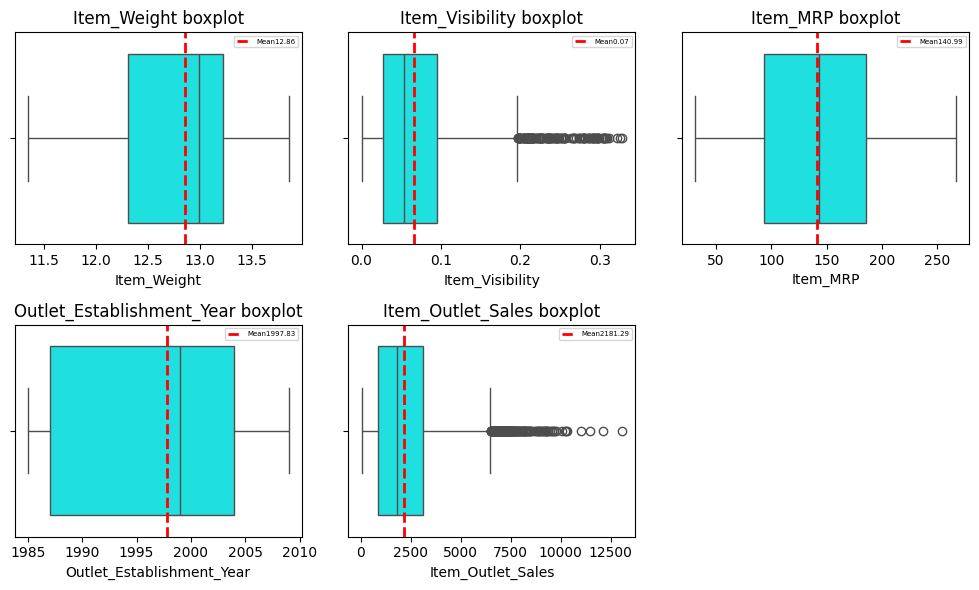

In [307]:

fig, axes = plt.subplots(nrows=int((df[num_col].shape[1])/2), ncols=df[num_col].shape[1]-int((df[num_col].shape[1])/2), figsize=(10, 6))

nrows=int((df[num_col].shape[1])/2)
ncols=df[num_col].shape[1]-int((df[num_col].shape[1])/2)
numb_col=0
for nrows in range(0,nrows):
     for ncols in range(0,ncols):

       sns.boxplot(data=df, x=num_col[numb_col], ax = axes[nrows,ncols], color = 'cyan')
       axes[nrows,ncols].set_title(num_col[numb_col]+' boxplot', fontsize = 12)
       mean=round(df[num_col[numb_col]].mean(),2)
       axes[nrows,ncols].axvline(x=df[num_col[numb_col]].mean(), color='red', linestyle='dashed', linewidth=2,label = f'Mean{mean}')
       axes[nrows,ncols].legend(fontsize = 5)

       numb_col+=1

plt.tight_layout()
fig.delaxes(axes[1,2])





In [311]:
df[cat_col]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Missing,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Missing,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


## 🗂️ Exploring Categories with Count Plots


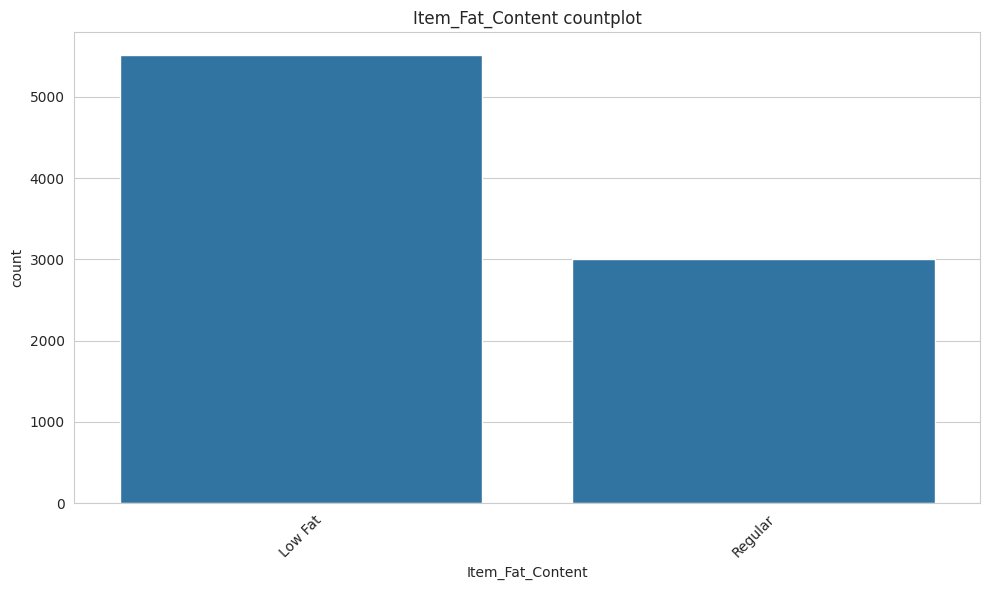

In [329]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x=cat_col[1])
ax.tick_params(axis='x', rotation=45, labelsize=10)
ax.set_title(cat_col[1]+' countplot')
plt.tight_layout()


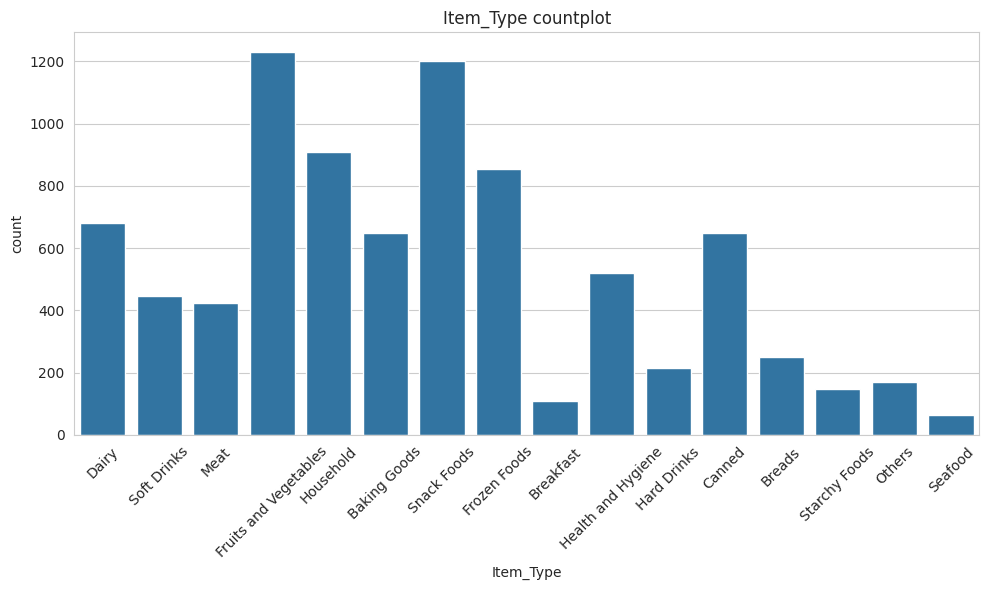

In [332]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(data=df, x=cat_col[2])
ax.tick_params(axis='x', rotation=45)
ax.set_title(cat_col[2]+' countplot')
plt.tight_layout()

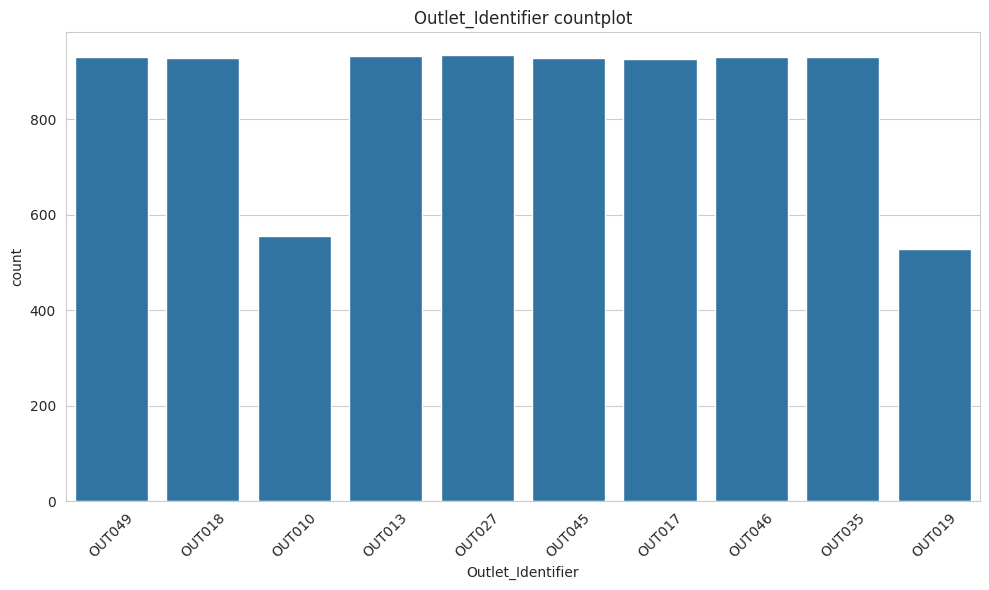

In [333]:
ig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(data=df, x=cat_col[3])
ax.tick_params(axis='x', rotation=45)
ax.set_title(cat_col[3]+' countplot')
plt.tight_layout()

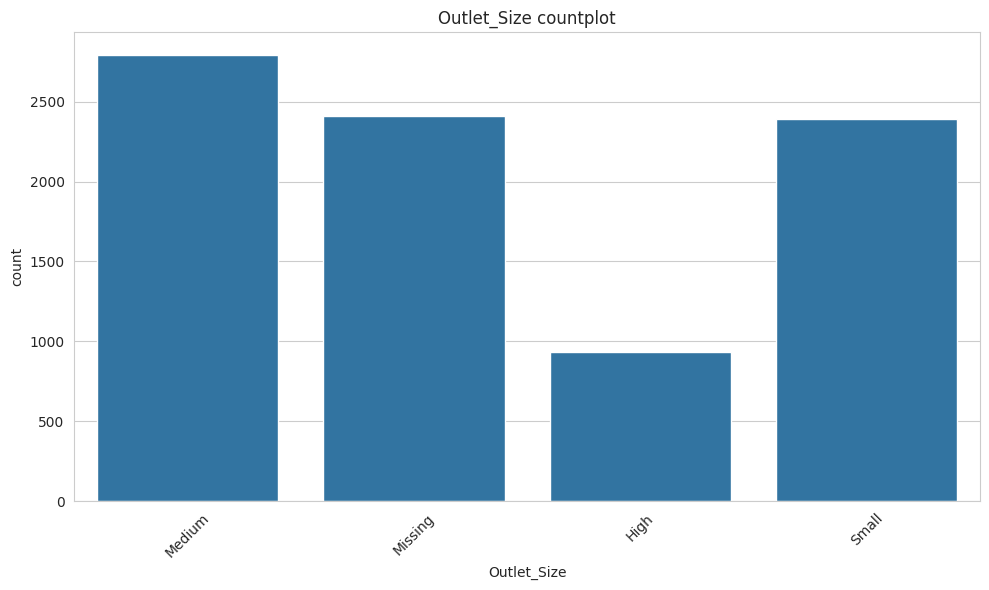

In [334]:
ig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(data=df, x=cat_col[4])
ax.tick_params(axis='x', rotation=45)
ax.set_title(cat_col[4]+' countplot')
plt.tight_layout()

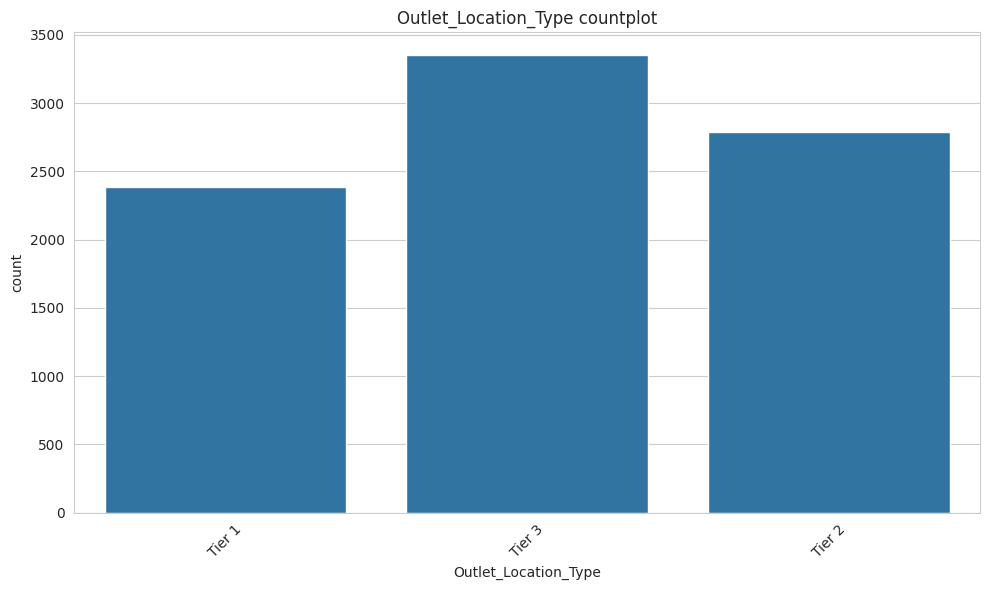

In [335]:
ig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(data=df, x=cat_col[5])
ax.tick_params(axis='x', rotation=45)
ax.set_title(cat_col[5]+' countplot')
plt.tight_layout()

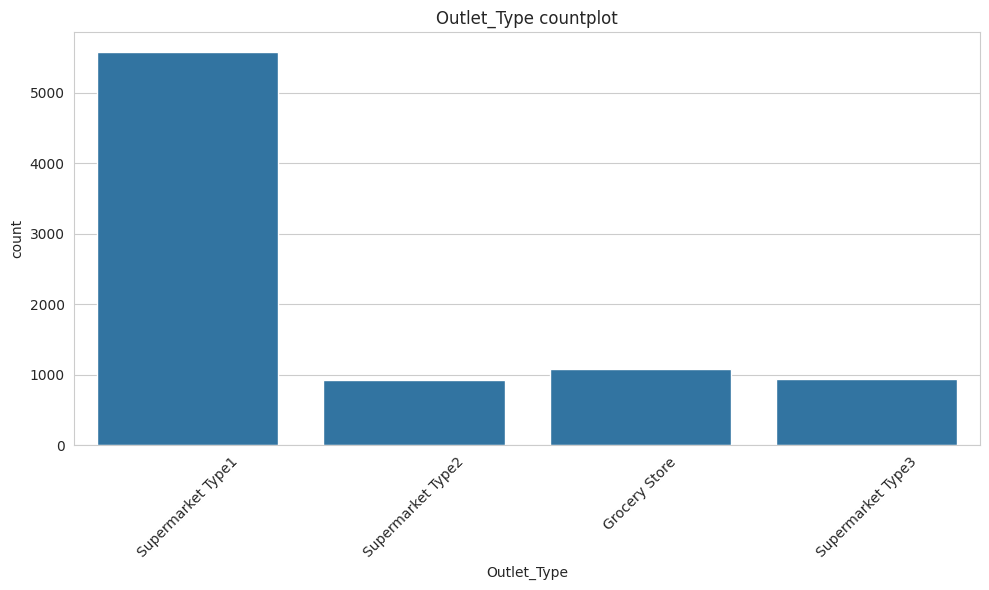

In [336]:
ig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(data=df, x=cat_col[6])
ax.tick_params(axis='x', rotation=45)
ax.set_title(cat_col[6]+' countplot')
plt.tight_layout()

Text(0.5, 1.0, 'Correlation Heatmap')

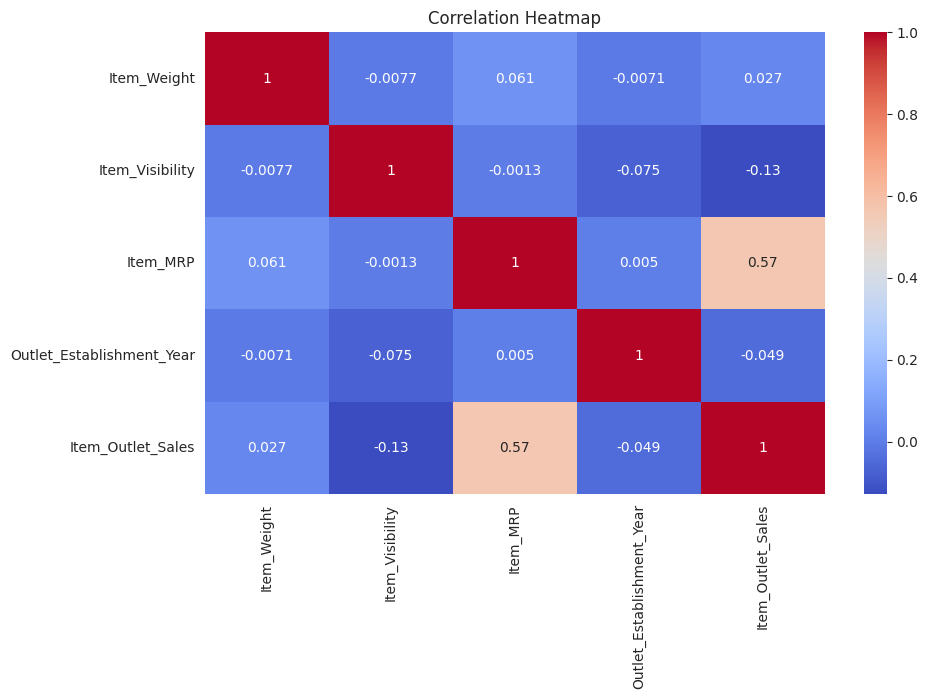

In [338]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm')
ax.set_title('Correlation Heatmap')

## Feature Inspection